# Project Summary
This project focuses on the application of predictive analytics to streamline the promotion process within a large multinational corporation (MNC) with multiple organizational verticals. Traditionally, identifying candidates for promotion has been manual and constrained by the time-consuming nature of HR evaluations and KPI-based assessments. By leveraging machine learning, this project aims to help the company predict which employees are most likely to be promoted to managerial positions and below, expediting their transition into new roles and enhancing HR efficiency.

# Business Understanding
Our client, a large MNC, operates across 9 broad organizational verticals. A primary challenge they face is identifying high-potential candidates for promotion in a timely manner. Currently, employees are recommended for promotion based on past performance and are required to complete training and evaluation programs specific to each vertical. Employees who achieve at least 60% KPI completion are considered for promotion, but final decisions are only made after all evaluations are completed, delaying the promotion cycle.

The goal is to help HR departments proactively identify employees eligible for promotion at a specific checkpoint, enabling a faster, data-driven promotion cycle.

# Problem Statement
The current promotion process for managerial positions and below is manual and time-intensive, leading to delays in transitioning employees into new roles. The HR department seeks a predictive model to assess the eligibility of employees for promotion based on demographic and performance data.

# Objectives
1. Data Analysis: Understand and analyze the factors influencing promotion eligibility.
2. Model Development: Build a predictive model using machine learning to classify employees as either eligible or ineligible for promotion based on provided attributes.
3. Evaluation: Evaluate the model's performance to ensure accuracy and reliability in predicting promotion outcomes.
4. Deployment Recommendation: Offer recommendations for deploying the model in a real-time HR environment to facilitate proactive promotion planning.


# Data Understanding

This section provides an overview of the datasets used in this project to predict employee promotions. 

The dataset consists of 54,808 observations of 14 variables.

We have two datasets:
- **Train Dataset**: Used for building the model. Contains information on current employees, their demographics, performance, and target labels indicating if they were promoted.
- **Test Dataset**: Used for model evaluation. Contains similar features but without the target labels.

The dataset provides comprehensive information about each employee's demographic profile, employment background, performance indicators, and training outcomes. Each record represents an employee and includes the following key features:

- **employee_id**: A unique identifier for each employee.
- **department**: The department to which the employee belongs, indicating their area of expertise.
- **region**: The geographical location of the employee’s role, represented as an unordered categorical variable.
- **education**: The highest level of education attained by the employee, which may influence role-specific skills and promotion potential.
- **gender**: The gender of the employee, providing insights into diversity in promotion patterns.
- **recruitment_channel**: The method by which the employee was recruited, indicating initial access channels.
- **no_of_trainings**: The number of training programs completed by the employee in the previous year, covering technical and soft skills.
- **age**: The employee’s age, which may correlate with experience and readiness for promotion.
- **previous_year_rating**: The performance rating assigned to the employee for the prior year.
- **length_of_service**: The number of years the employee has been with the organization, reflecting organizational experience.
- **KPIs_met >80%**: A binary indicator of whether the employee met over 80% of their Key Performance Indicators (KPIs) in the past year.
- **awards_won?**: A binary indicator showing if the employee received any awards in the previous year, which may highlight recognition of outstanding performance.
- **avg_training_score**: The average score achieved by the employee in recent training evaluations, which reflects skill development and training outcomes.
- **is_promoted**: The target variable indicating if the employee was recommended for promotion (1) or not (0).

Understanding these variables is crucial as they are the basis for training a model to predict promotion eligibility. By analyzing patterns in demographic and performance-related data, we aim to identify the factors most strongly associated with promotion, facilitating more objective and efficient promotion decisions.

# Data Exploration

# Importing the libraries

In [32]:
#Importing the necessary classes, functions, and packages needed.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Markdown, display
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [33]:
#Importing the provided train and test data

train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print (f"train_data = {train.shape}")
print (f"test_data = {test.shape}")

train_data = (54808, 14)
test_data = (23490, 13)


**Understanding the data**

In [34]:
# Data Preview
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [35]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [36]:
# Checking Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [38]:
# Checking the Summary Statistics
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [39]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


### Initial Observations and Data Quality
- **Missing Values**: The `previous_year_rating` and `education` features has some missing values.
- **Outliers**: The `length_of_service` has a few extreme values, possibly representing long-tenured employees.
- **Class Imbalance**: The target variable `is_promoted` may be imbalanced, which could impact model performance.

These observations guide our data cleaning and preprocessing steps.

# Data Cleaning

**Checking for Duplicates**

In [40]:
# Checking for duplicates based on the employee_id column
train.duplicated(['employee_id']).sum()

0

In [41]:
test.duplicated(['employee_id']).sum()

0

**Handling Missing Values**

In [42]:
# Checking for Null values
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          54808
department                         0              9
region                             0             34
education                       2409              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating            4124              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          23490
department                      

In [43]:
# drop values that are null
train.dropna(axis=0,inplace=True)
test.dropna(axis=0, inplace=True)

In [44]:
# Confirm Null values dropped
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          48660
department                         0              9
region                             0             34
education                          0              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating               0              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          20819
department                      

**Checking for Outliers**

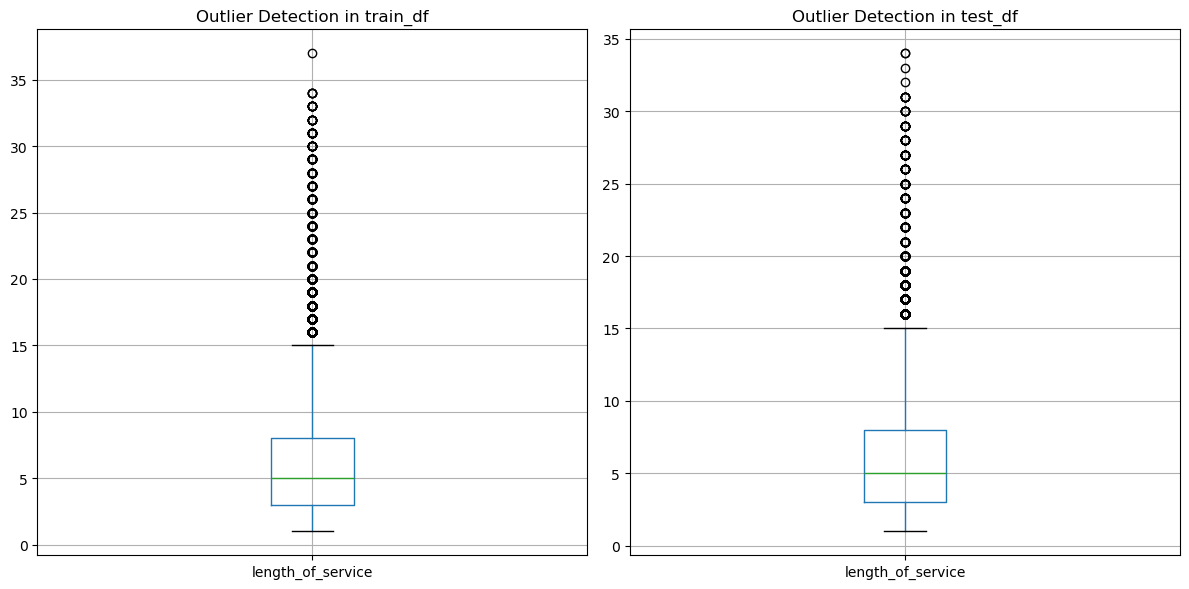

In [45]:
#Checking for Outliers
# Plot box plots to visualize outliers in the datasets
dataframes = [('train_df', train), ('test_df', test)]

# Plot side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax, (name, df) in zip(axes, dataframes):
    df[['length_of_service']].boxplot(ax=ax)
    ax.set_title(f'Outlier Detection in {name}')

plt.tight_layout()
plt.show()

## Looking into the columns

**Region Column**

In [46]:
#Checking the count of unique values in the region column
train.region.value_counts()

region
region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: count, dtype: int64

The region column could be simplified by grouping less common regions into an "Other" category, this will help reduce complexity and improve the models performance.

In [47]:
# Define threshold for grouping into "Other"
threshold = 1000

# Identify regions that meet the threshold criteria
common_regions = train['region'].value_counts()
common_regions = common_regions[common_regions >= threshold].index

# Use np.where to assign regions based on the threshold
train['region_cleaned'] = np.where(train['region'].isin(common_regions), train['region'], 'Other')

In [48]:
#Checking the number of unique values in the cleaned region column
train.region_cleaned.nunique()

14

**Age Column**

In [49]:
# Checking the count of unique values in the age column
train.age.value_counts()

age
32    3389
31    3268
30    3202
33    3106
34    2989
29    2731
35    2637
36    2451
28    2301
37    2117
27    2015
38    1875
39    1647
40    1616
26    1472
41    1254
42    1127
43     962
44     824
25     784
45     739
46     684
48     548
47     539
50     507
49     434
51     378
24     362
53     345
52     343
54     305
55     284
56     263
57     235
60     210
58     207
59     202
23     144
22      84
20      51
21      29
Name: count, dtype: int64

**Creating the age group feature**

The high number of unique values can make the model overly complex, resulting in the curse of dimensionality. To address this, we created a new feature called 'age_group' by binning the age values into the following categories:

Under 20 <br>
20-30 <br>
30-40 <br>
40-50 <br>
50-60 <br>
Over 60

In [50]:
train['age_group'] = pd.cut(train['age'], bins=[-1, 20, 30, 40, 50, 60, 70], 
                              labels=['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60'])

**Length of Service column**

In [51]:
#Checking the count of unique values in the length of service column
train.length_of_service.value_counts()


length_of_service
3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: count, dtype: int64

**Creating the service group feature**

To better capture the non-linear relationship between length of service and promotion potential, I created a new feature called 'service_group' by binning the length_of_service values into the following categories:

Less than 2 years<br>
2-5 years<br>
5-10 years<br>
Over 10 years<br>

In [52]:
train['service_group'] = pd.cut(train['length_of_service'], bins=[-0.1, 2, 5, 10, 20], 
                                  labels=['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years'])

**average_training_score column**

In [53]:
train.avg_training_score.describe()

count    48660.000000
mean        63.603309
std         13.273502
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [54]:
train.avg_training_score.value_counts()

avg_training_score
50    2303
49    2287
48    2081
60    1988
51    1980
      ... 
99      34
98      32
41      24
40       4
39       2
Name: count, Length: 61, dtype: int64

In [55]:
train['score_group'] = pd.cut(
    train['avg_training_score'], bins=[-0.1, 50, 60, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

The binning of avg_training_score is based on the score distribution and quartile values, creating categories that are easy to interpret and meaningful. These bins—Low (≤50), Medium (51-60), High (61-75), and Very High (>75)—align with performance levels, helping to identify employees’ training outcomes as underperforming, average, above-average, or top performers. This approach improves interpretability, reduces model complexity, and maintains consistency across data points.

**is_promoted Column**

Class Distribution (Percentage):
is_promoted
0    91.302918
1     8.697082
Name: proportion, dtype: float64


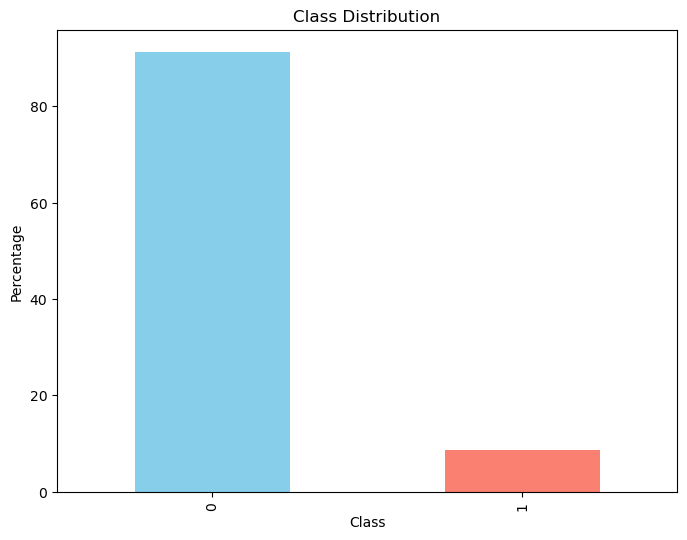

In [56]:
# Check class imbalance
def check_class_imbalance(df, target_column):
    # Calculate value counts
    value_counts = df[target_column].value_counts(normalize=True) * 100
    print("Class Distribution (Percentage):")
    print(value_counts)
    
    # Plot the class distribution
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.show()

# Check class imbalance in the train dataset
check_class_imbalance(train, 'is_promoted')

The class distribution shows a significant class imbalance, with 91.3% of instances labeled as "0" (not promoted) and only 8.7% labeled as "1" (promoted). This imbalance means the dataset has many more examples of employees who were not promoted compared to those who were.

# Exploratory Data Analysis

## Univariate Analysis

**Distribution of Categorical Features**

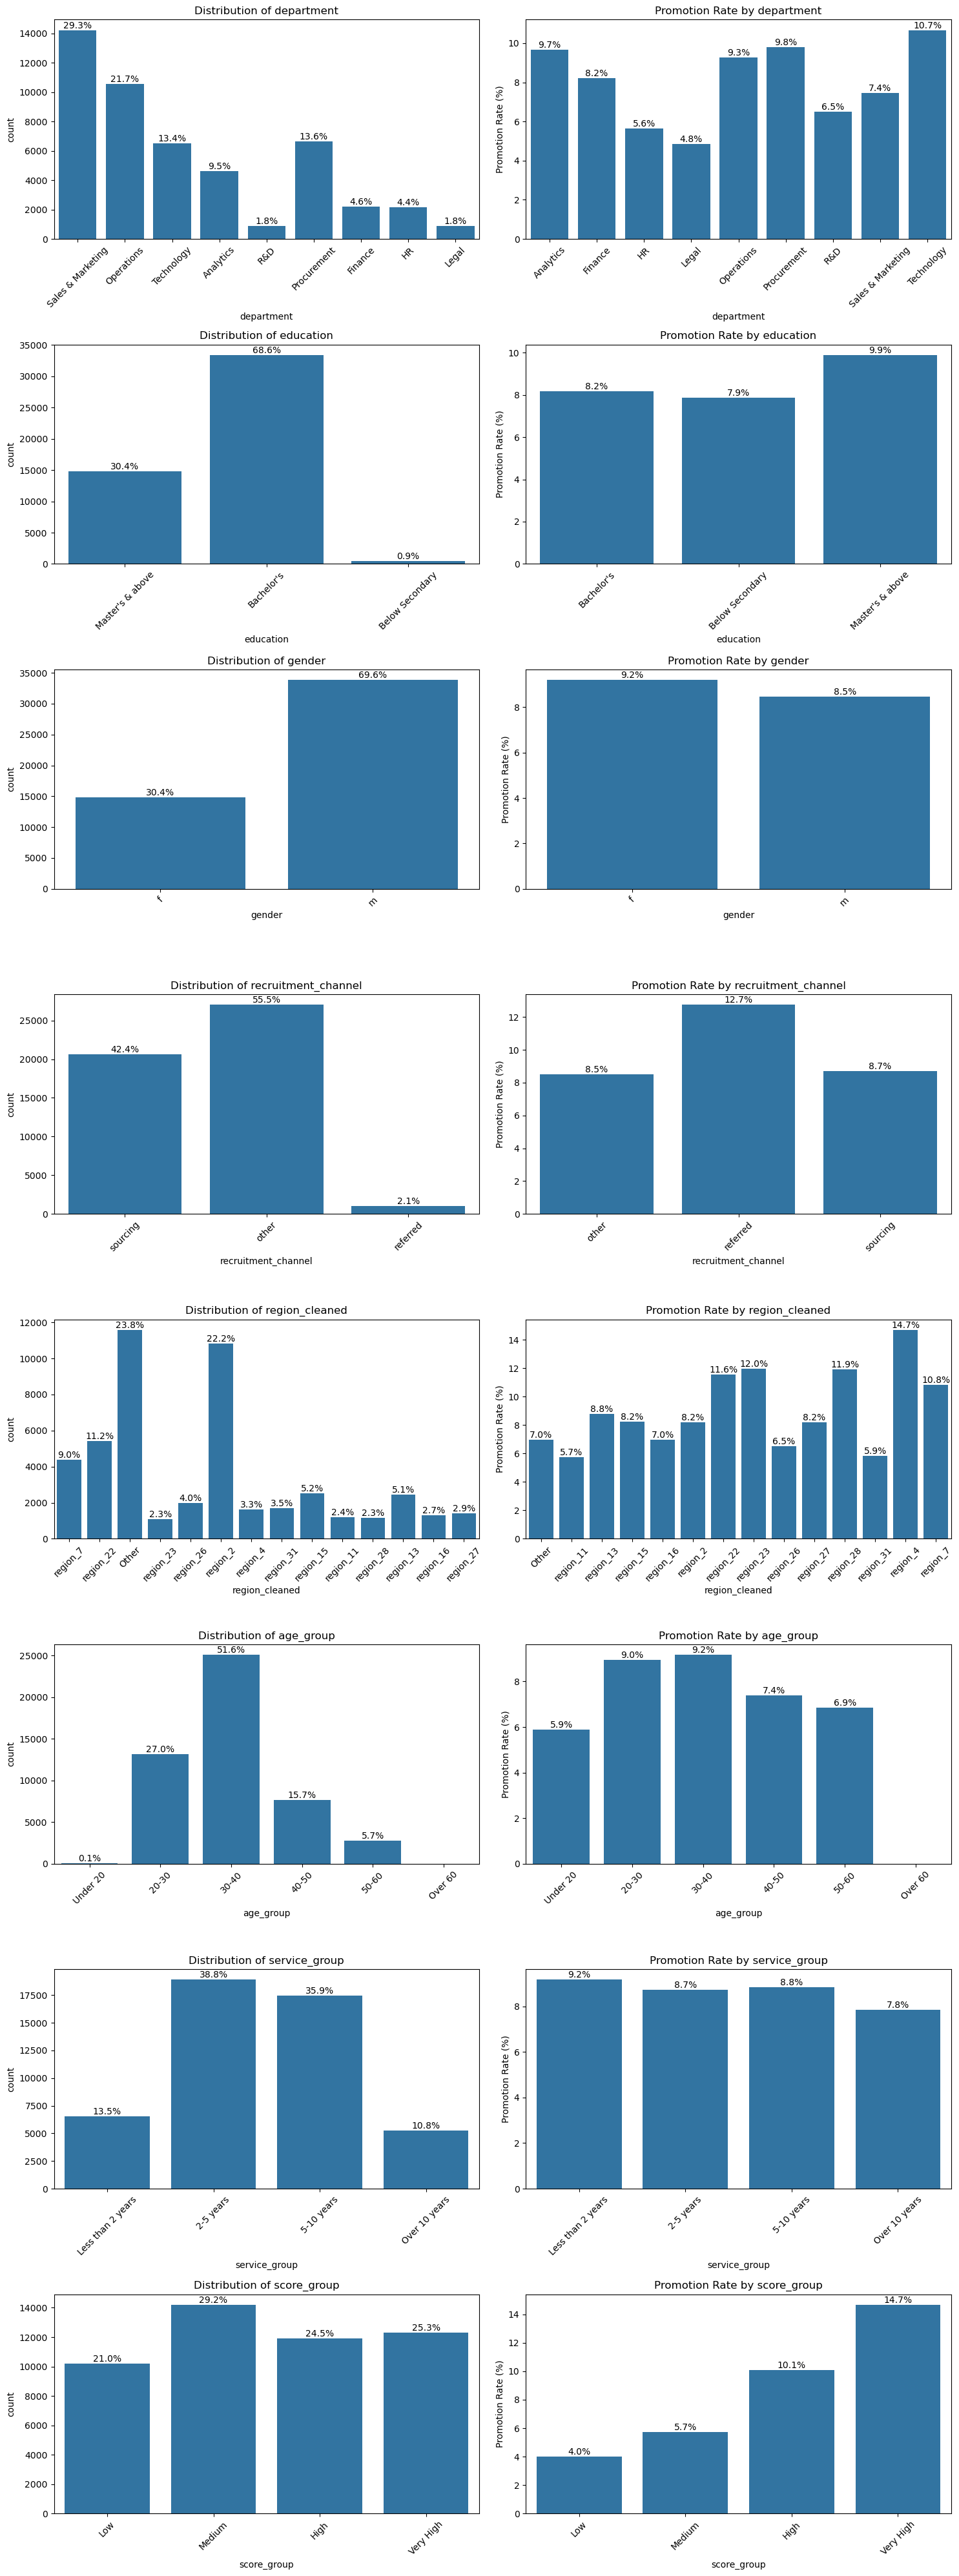

In [57]:
def plot_categorical_distributions(train, columns, target='is_promoted'):
    plt.figure(figsize=(15, len(columns) * 5))
    
    for idx, col in enumerate(columns, 1):
        # Plot distribution of the categorical feature
        plt.subplot(len(columns), 2, 2 * idx - 1)
        ax1 = sns.countplot(data=train, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars
        total = len(train)
        for p in ax1.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax1.annotate(percentage, (x, y), ha='center', va='bottom')

        # Plot promotion rate by category
        plt.subplot(len(columns), 2, 2 * idx)
        promotion_rate = train.groupby(col)[target].mean() * 100
        ax2 = sns.barplot(x=promotion_rate.index, y=promotion_rate.values)
        plt.title(f'Promotion Rate by {col}')
        plt.ylabel('Promotion Rate (%)')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars for promotion rate
        for p in ax2.patches:
            percentage = f'{p.get_height():.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax2.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Define categorical columns
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 
                   'region_cleaned', 'age_group', 'service_group', 'score_group']

# Call the function
plot_categorical_distributions(train, categorical_cols)

**Insights**

**Distribution of Department**

The department distribution shows that Sales & Marketing is the largest department, comprising 29.3% of the workforce, followed by Operations at 21.7% and Technology at 13.4%. Promotion rates are highest in Technology (10.7%), with Procurement, Analytics, and Operations also showing strong promotion rates. In contrast, HR and Legal have lower promotion rates, suggesting areas for potential improvement.

**Distribution of Education**

In terms of education, 68.6% of employees hold a Bachelor’s degree, while 30.4% have a Master’s degree or higher. Promotion rates increase with educational level, as employees with advanced degrees have a promotion rate of 9.9%, compared to 8.2% for Bachelor’s degree holders.

**Gender Distribution**

The gender distribution shows a predominantly male workforce at 69.6%, with females comprising 30.4%. However, females have a slightly higher promotion rate at 9.2% compared to males, suggesting equitable advancement opportunities.

**Recruitment Channel Distribution**

Recruitment channels are primarily led by “Other” methods (55.5%), followed by sourcing (42.4%), with referrals at 2.1%. Referred employees have the highest promotion rate at 12.7%, highlighting the effectiveness of referrals in bringing high-potential talent.

**Region Distribution and Promotion Rate**

In the regional distribution, the “Other” category and region_22 have the highest employee counts, while region_4 leads in promotion rate at 14.7%. Other regions show varied advancement rates, indicating regional differences in promotion opportunities.

**Age Group Distribution and Promotion Rate**

In terms of age distribution, employees aged 30-40 form the largest group and have the highest promotion rate at 9.2%, closely followed by those aged 20-30. Promotion rates decline for those over 50, with no promotions reported for employees over 60.

**Service Group Distribution and Promotion Rate**

The tenure distribution reveals that most employees have 2-5 or 5-10 years of service. Employees with less than 2 years show the highest promotion rate at 9.2%, while those with over 10 years have lower promotion rates, indicating potential career stagnation for long-term employees.

**Promotion Rate by Score Group**

Performance scores indicate that High and Very High scorers make up around half of the workforce, with these groups seeing the highest promotion rates, particularly the Very High group at 14.7%. Lower scores are associated with fewer promotions, highlighting a potential need for support and development in these employees.


**Distribution of numeric columns and Promotion Status**

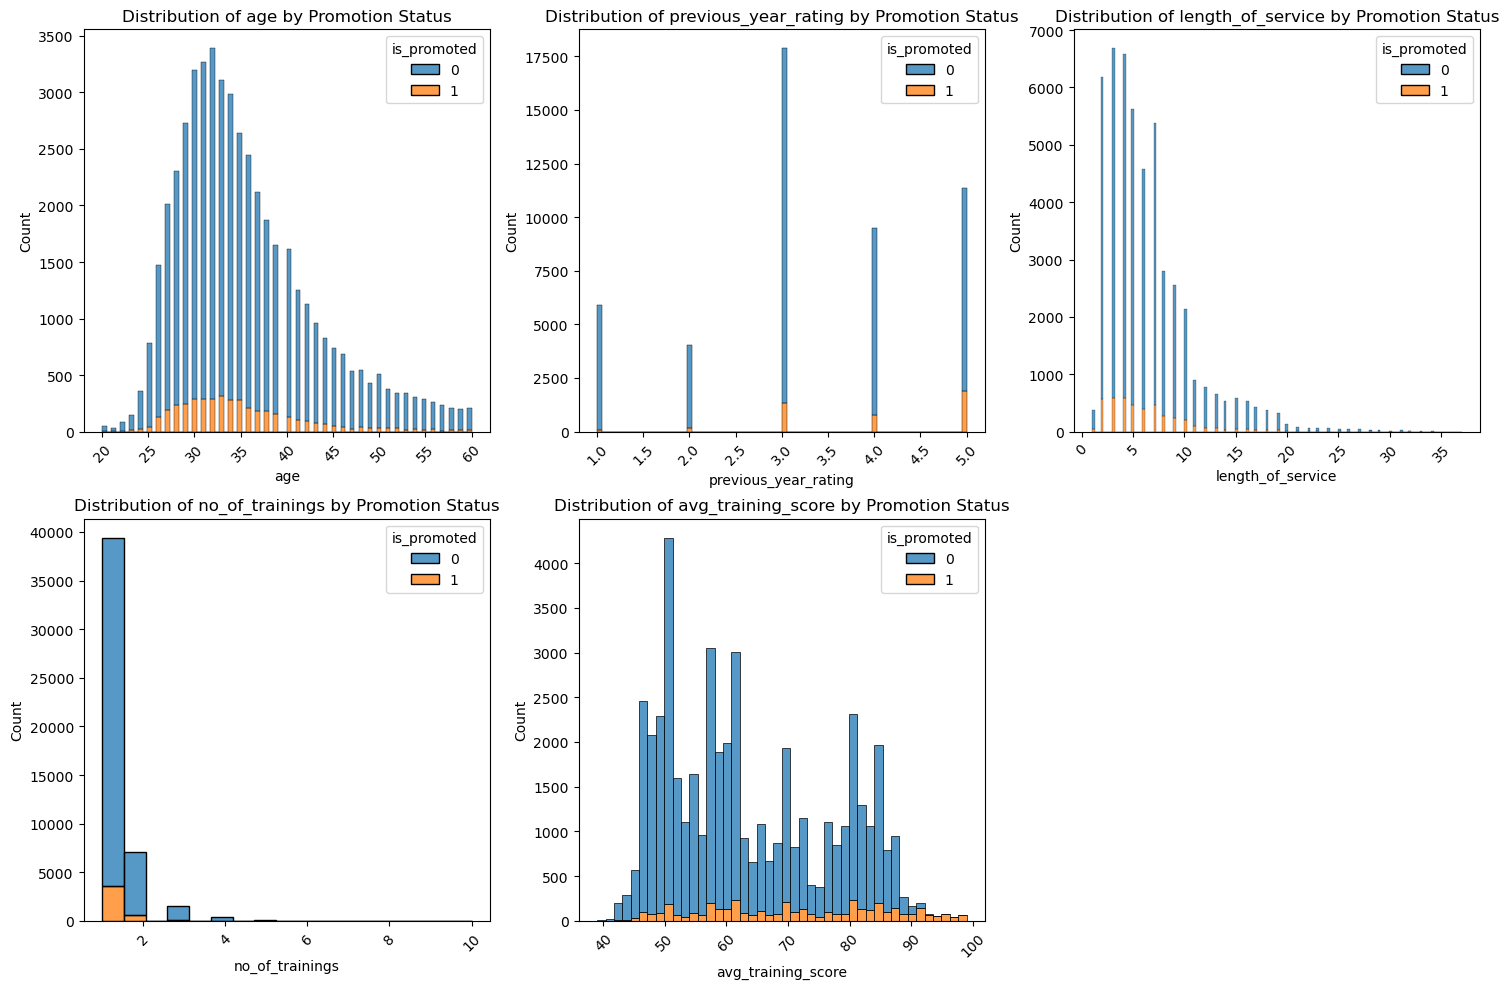

In [58]:
numerical_cols = ['age', 'previous_year_rating', 'length_of_service', 
                 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(data=train, x=col, hue='is_promoted', multiple="stack")
    plt.title(f'Distribution of {col} by Promotion Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Age Distribution by Promotion Status**  
   Most employees are between 25 and 40, with a peak in the 30-35 range. Promotion rates are highest among employees aged 30-40, with fewer promotions for younger (<30) and older (>40) employees. The data may suggest a preference for promoting employees in their 30s, warranting a review to ensure age inclusivity in promotion practices.

2. **Previous Year Rating Distribution by Promotion Status**  
   Employee ratings are mostly concentrated around 3, with fewer at 1, 2, 4, and 5. Higher ratings (3, 4, and 5) correlate with more promotions, while lower ratings (1 and 2) see fewer promotions. This highlights the importance of performance ratings in promotion decisions and suggests that employees with lower ratings may benefit from support and training to boost promotion chances.

3. **Length of Service Distribution by Promotion Status**  
   Most employees have 0-10 years of service, with a drop-off for those over 10 years. Employees with 2-10 years see more promotions, while both new hires (<2 years) and long-term employees (>10 years) have fewer promotions. This suggests a mid-career advantage, with a need to create growth opportunities for long-term employees to encourage retention.

4. **Number of Trainings Distribution by Promotion Status**  
   Most employees have attended 1-2 trainings, and promotions are more common among those with 1-3 trainings. Those with over 3 trainings see fewer promotions, indicating that a moderate amount of training is linked to higher promotion rates. This suggests a need to assess the relevance of training for employees with multiple trainings to ensure it aligns with promotion goals.

5. **Average Training Score Distribution by Promotion Status**  
   Training scores are spread widely, with common scores around 50, 60, 70, and 80. Promotions are more frequent among those scoring 60-80, indicating that high performance in training correlates with promotion likelihood. High-quality, impactful training programs can help improve employee performance and advancement potential.

## Correlation Analysis for Numerical Variables 

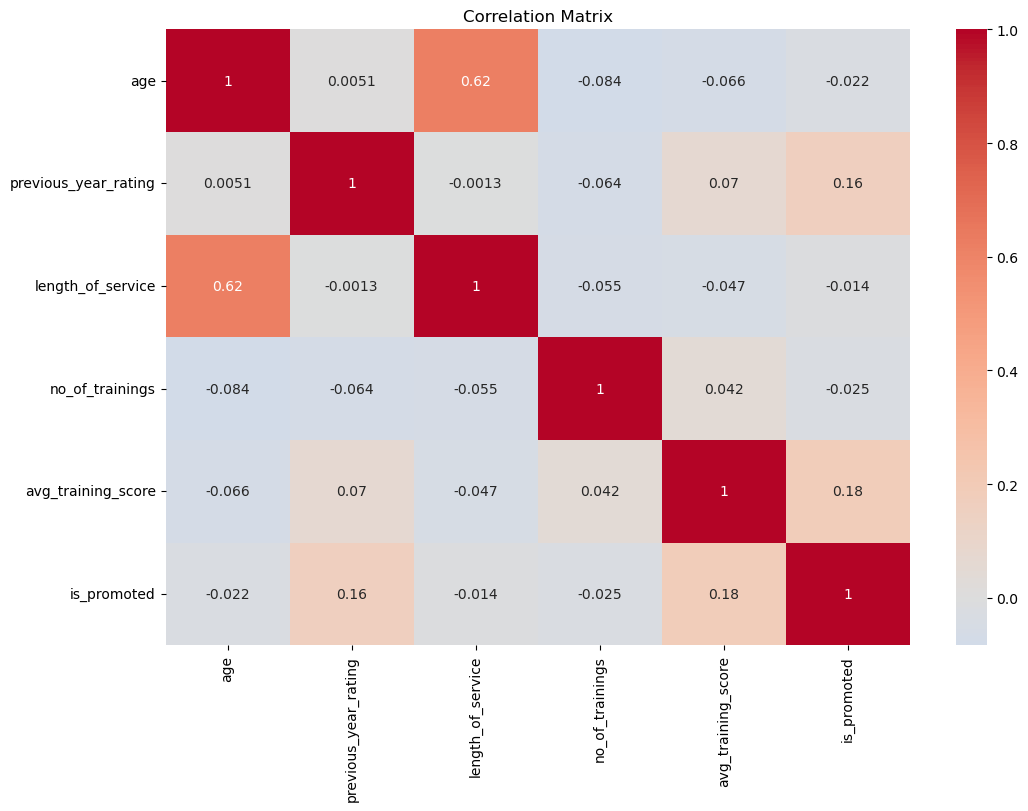

In [59]:
plt.figure(figsize=(12, 8))
correlation_matrix = train[numerical_cols + ['is_promoted']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Insight**

There is a strong positive correlation between age and length of service. This indicates that older employees tend to have been with the company longer, which is intuitive but may lead to multicollinearity if both features are included in the model.

## Chi-square test for categorical values

In [64]:
# Chi-square test for categorical variables
def chi_square_test(df, categorical_cols, target='is_promoted'):
    results = []
    for col in categorical_cols:
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(df[col], df[target])
        )
        results.append({
            'Feature': col,
            'Chi-Square': chi2,
            'p-value': p_value
        })
    return pd.DataFrame(results).sort_values('Chi-Square', ascending=False)

chi_square_results = chi_square_test(train, categorical_cols)
print("\nChi-Square Test Results:")
print(chi_square_results)


Chi-Square Test Results:
               Feature   Chi-Square        p-value
7          score_group  1024.182080  1.021502e-221
4       region_cleaned   280.815474   2.456692e-52
0           department   127.616304   8.821096e-24
1            education    37.942473   5.766294e-09
5            age_group    37.320493   1.547201e-07
3  recruitment_channel    22.082732   1.602492e-05
6        service_group     7.061484   6.996367e-02
2               gender     6.809753   9.066131e-03


1. **Score Group**: The Chi-Square test revealed a remarkably high Chi-Square value of 1024.18 and a p-value of 1.02e-221 for the score_group feature. This indicates a very strong association with promotion status, suggesting that employees' performance scores are likely a critical factor influencing promotion decisions. Higher performance scores correlate with a greater likelihood of receiving a promotion.

2. **Region Cleaned**: The region_cleaned feature also demonstrated a strong association with promotion status, as evidenced by a Chi-Square value of 280.82 and a p-value of 2.46e-52. This suggests that the region in which employees work significantly impacts their likelihood of promotion, potentially due to varying performance levels, opportunities, or company policies across different regions.

3. **Department**: The department feature showed a significant association with promotion status, reflected in a Chi-Square value of 127.62 and a p-value of 8.82e-24. This implies that different departments may have varying promotion criteria, opportunities, and rates, which can affect the chances of employees being promoted within the organization.

4. **Education**: The analysis of the education feature revealed a Chi-Square value of 37.94 and a p-value of 5.77e-09, indicating a significant association with promotion status. This suggests that higher education levels are correlated with better promotion prospects, highlighting the importance of educational qualifications in influencing career advancement opportunities.

5. **Age Group**: The age_group feature displayed a significant association with promotion status, demonstrated by a Chi-Square value of 37.32 and a p-value of 1.55e-07. This suggests that certain age groups, particularly those in their 30s, are more likely to be promoted, possibly due to factors such as experience, energy levels, or company policies that favor particular age demographics.

6. **Recruitment Channel**: The recruitment_channel feature showed a significant association with promotion status, with a Chi-Square value of 22.08 and a p-value of 1.60e-05. This finding suggests that different recruitment channels yield employees with varying performance levels and promotion rates, indicating that the method of recruitment may influence promotion outcomes.

7. **Service Group**: The service_group feature had a Chi-Square value of 7.06 and a p-value of 0.0699, indicating a lower but still significant association with promotion status. This suggests that the length of service may impact promotion likelihood, though the effect might be less pronounced compared to other features analyzed in the study.

8. **Gender**: Lastly, the gender feature exhibited a statistically significant association with promotion status, with a Chi-Square value of 6.81 and a p-value of 0.0091. This indicates that there are gender-related differences in promotion rates within the organization, suggesting the need for further examination of promotion practices to ensure equity across genders.

# Feature Engineering

# Recommendations

Departmental Focus:

The Technology department, with the highest promotion rate, might be leveraging effective talent development and career progression programs. Other departments could benefit from analyzing these strategies.

HR and Legal departments could review their promotion criteria and employee development programs to enhance career advancement opportunities.

Educational Attainment:

Higher educational qualifications correlate with higher promotion rates, suggesting that advanced degrees might offer better career advancement opportunities.

Companies could incentivize further education or provide educational support to employees to enhance their career growth.

Data Imbalance:

The data shows some imbalance with significantly more employees in Bachelors degree categories. This should be considered in model training to
Targeted HR Strategies:

Region-Specific Initiatives: Develop targeted initiatives for regions with low promotion rates. This could include mentorship programs, training, and clear career progression pathways.

Age-Inclusive Policies: Implement policies that ensure fair opportunities for all age groups, including tailored training and professional development programs for older employees.

Performance Monitoring:

Regularly track promotion rates across regions and age groups to identify and address any disparities.

Use these insights to inform HR policies and ensure equitable promotion practices.

Employee Feedback:

Collect feedback from employees in regions and age groups with lower promotion rates to understand their challenges and improve HR practices. avoid biases.